In [47]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [48]:
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [49]:

# Read the city data file and store it in a pandas DataFrame.
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [50]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12


In [51]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [52]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [53]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [54]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [55]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [56]:
sum(city_data_df["type"]=="Suburban")

36

In [57]:
sum(city_data_df["type"]=="Rural")

18

In [58]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [59]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [60]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [61]:
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural


In [62]:
# Create the Urban city DataFrame.
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [63]:
#Create thr Suburban and rural Data frame
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/19 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/19 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/19 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/19 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/19 8:57,51.80,4.018030e+12,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural


In [64]:
# Get the number of rides for urban cities.
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [65]:
# Create the suburbanl ride count.
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [66]:
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [67]:
# Create the rural ride count.
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [68]:

# Get average fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [69]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [70]:
# Get average fare for each city in the rural cities.
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [71]:
# Get the average number of drivers for each urban city.
urban_drivers_count=urban_cities_df.groupby(["city"]).count()["driver_count"]
urban_drivers_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: driver_count, Length: 66, dtype: int64

In [72]:
suburban_drivers_count=suburban_cities_df.groupby(["city"]).count()["driver_count"]
suburban_drivers_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: driver_count, dtype: int64

In [73]:
# Create the rural ride count.
rural_drivers_count=rural_cities_df.groupby(["city"]).count()["driver_count"]
rural_drivers_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: driver_count, dtype: int64

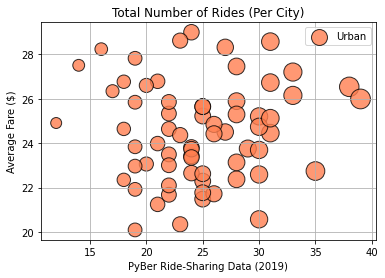

In [82]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_drivers_count,color='coral',edgecolor="black",linewidth=1,alpha=0.8,label="Urban")
plt.xlabel("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.title("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

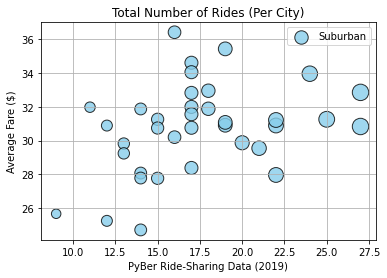

In [85]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_drivers_count,color='skyblue',edgecolor="black",linewidth=1,alpha=0.8,label="Suburban")
plt.xlabel("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.title("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

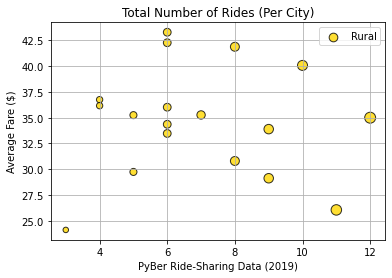

In [86]:
# Build the scatter plots forRural cities.
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_drivers_count,color='gold',edgecolor="black",linewidth=1,alpha=0.8,label="Rural")
plt.xlabel("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.title("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

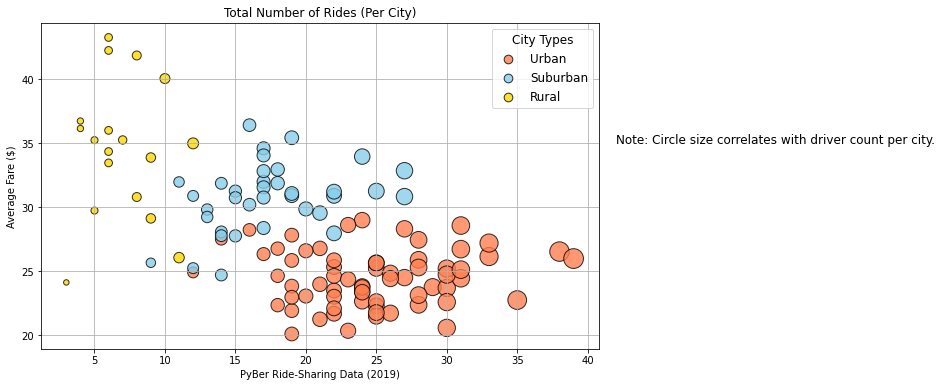

In [91]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_drivers_count,color='coral',edgecolor="black",linewidth=1,alpha=0.8,label="Urban")


plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_drivers_count,color='skyblue',edgecolor="black",linewidth=1,alpha=0.8,label="Suburban")


# Incorporate the other graph properties
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_drivers_count,color='gold',edgecolor="black",linewidth=1,alpha=0.8,label="Rural")
plt.xlabel("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.title("Total Number of Rides (Per City)")
plt.grid(True)
#Add legend
lgnd=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
plt.show()

In [92]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [93]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [94]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [95]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [96]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [97]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [98]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [99]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)


(24.0, 17.0, 6.0)

In [100]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)



(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

An optional approach to calculating the mean, median, and mode

In [101]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts


In [102]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [103]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


In [104]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


In [105]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [109]:
mean_urban_fares=np.mean(urban_fares)
print(f"The mean for the urban fares for the urban trips is {mean_urban_fares:.2f}." )
median_urban_fares=np.median(urban_fares)
print(f"The median for the urban fares for the urban trips is {median_urban_fares:.2f}.")
mode_urban_fares=sts.mode(urban_fares)
print(f"The mode for the urban fares for the urban trips is {mode_urban_fares}.")
#print(f"The mode for the ride counts for urban trips is {mode_urban_fares}.")

The mean for the urban fares for the urban trips is 24.53.
The median for the urban fares for the urban trips is 24.64.
The mode for the urban fares for the urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [110]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()



1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [120]:
mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean for the suburban fares for the suburban trips is {mean_suburban_fares:.2f}." )
median_suburban_fares=np.median(suburban_fares)
print(f"The median for the suburban fares for the suburban trips is {median_suburban_fares:.2f}.")
mode_suburban_fares=sts.mode(suburban_fares)
print(f"The mode for the suburban fares for the suburban trips is {mode_suburban_fares}.")

The mean for the suburban fares for the suburban trips is 30.97.
The median for the suburban fares for the suburban trips is 30.75.
The mode for the suburban fares for the suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [117]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [119]:
mean_rural_fares=np.mean(rural_fares)
print(f"The mean for the ruralfares for the rural trips is {mean_rural_fares:.2f}." )
median_rural_fares=np.median(rural_fares)
print(f"The median for the ruralfares for the rural trips is {median_rural_fares:.2f}.")
mode_rural_fares=sts.mode(rural_fares)
print(f"The mode for the rural fares for the rural trips is {mode_rural_fares}.")

The mean for the ruralfares for the rural trips is 34.62.
The median for the ruralfares for the rural trips is 37.05.
The mode for the rural fares for the rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [121]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [123]:
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean for the urban drivers for the urban trips is {mean_urban_drivers:.2f}." )
median_urban_drivers=np.median(urban_drivers)
print(f"The median for the urban drivers for the urban trips is {median_urban_drivers:.2f}.")
mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode for the urban drivers for the urban trips is {mode_urban_drivers}.")

The mean for the urban drivers for the urban trips is 36.68.
The median for the urban drivers for the urban trips is 37.00.
The mode for the urban drivers for the urban trips is ModeResult(mode=array([39]), count=array([86])).


In [124]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [125]:
mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean for the suburban drivers for the suburban trips is {mean_suburban_drivers:.2f}." )
median_suburban_drivers=np.median(suburban_drivers)
print(f"The median for the suburban drivers for the suburban trips is {median_suburban_drivers:.2f}.")
mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode for the suburban drivers for the suburban trips is {mode_suburban_drivers}.")

The mean for the suburban drivers for the suburban trips is 13.71.
The median for the suburban drivers for the suburban trips is 16.00.
The mode for the suburban drivers for the suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [127]:
# Get the driver count data from the suburban cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [128]:
mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean for the rural drivers for the rural trips is {mean_rural_drivers:.2f}." )
median_rural_drivers=np.median(rural_drivers)
print(f"The median for the rural drivers for the rural trips is {median_rural_drivers:.2f}.")
mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode for the rural drivers for the rural trips is {mode_rural_drivers}.")

The mean for the rural drivers for the rural trips is 4.30.
The median for the rural drivers for the rural trips is 4.00.
The mode for the rural drivers for the rural trips is ModeResult(mode=array([1]), count=array([32])).


## Box-and-Whisker Plots for Ride Count Data

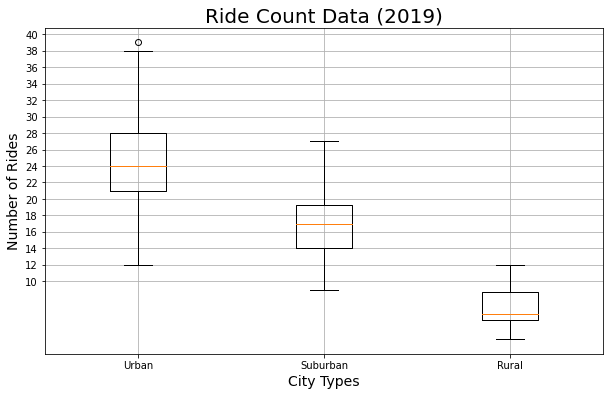

In [131]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
ride_count_data=(urban_ride_count,suburban_ride_count,rural_ride_count)
ax.boxplot(ride_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()


In [132]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


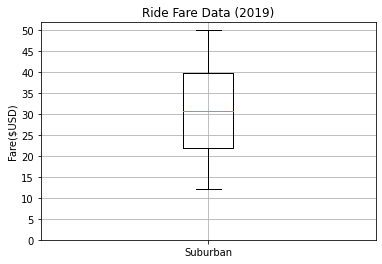

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [140]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

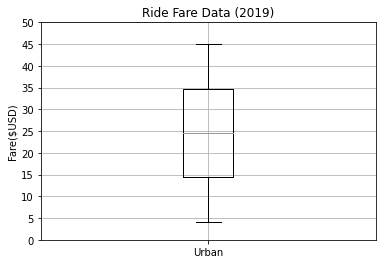

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [139]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

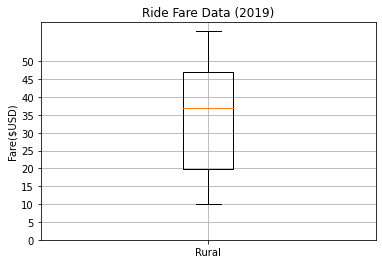

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [141]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

## Box-and-Whisker Plots for Ride Fare Data 

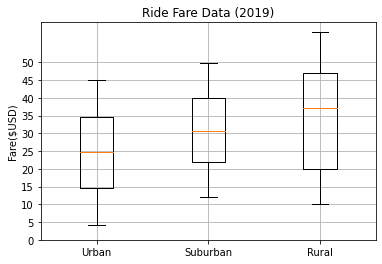

<Figure size 432x288 with 0 Axes>

In [142]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
ride_fare_data=(urban_fares,suburban_fares,rural_fares)
ax.boxplot(ride_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig3.png")


## Box-and-Whisker Plots for Driver Count Data

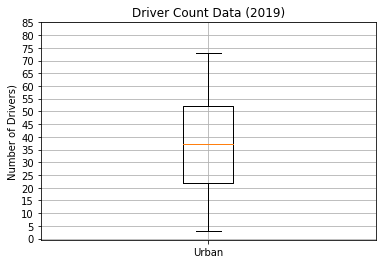

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [143]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


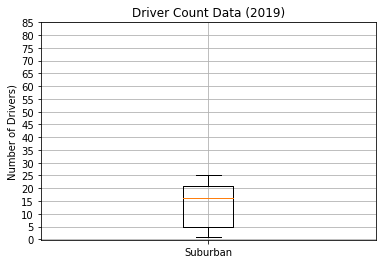

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [144]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()



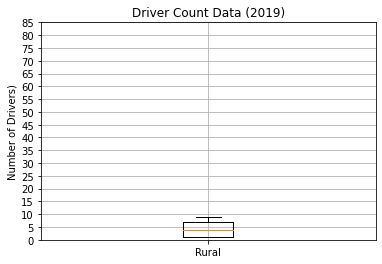

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [145]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()



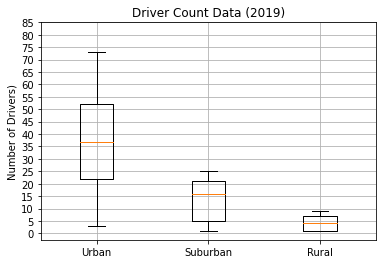

<Figure size 432x288 with 0 Axes>

In [147]:
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
driver_count_data=(urban_drivers,suburban_drivers,rural_drivers)
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig4.png")

In [149]:
# Get the sum of the fares for each city type.
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [150]:
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [151]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

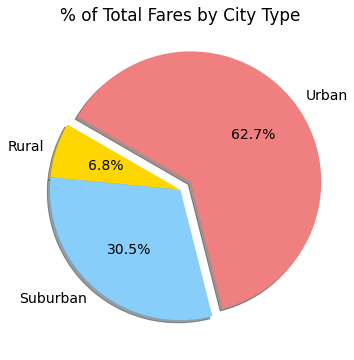

In [182]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
plt.show()

In [162]:
sum_rides_by_type=pyber_data_df.groupby(["type"]).sum()['ride_id']
sum_rides_by_type

type
Rural       5.809682e+14
Suburban    3.106884e+15
Urban       7.919413e+15
Name: ride_id, dtype: float64

In [166]:
total_rides=pyber_data_df['ride_id'].sum()
total_rides

1.160726528531315e+16

In [164]:
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

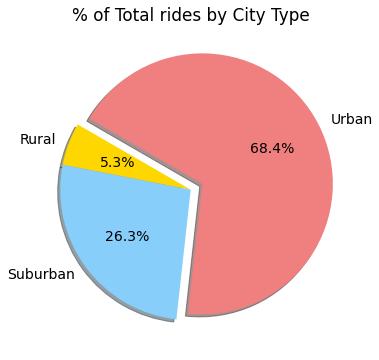

In [180]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
plt.show()

In [176]:
sum_driver_by_type=pyber_data_df.groupby(["type"]).sum()['driver_count']
sum_driver_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [177]:
total_driver=pyber_data_df['driver_count'].sum()
total_driver

68709

In [189]:
driver_percents1 = 100 * pyber_data_df.groupby(["type"]).sum()['driver_count'] / pyber_data_df['driver_count'].sum()
driver_percents1



type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

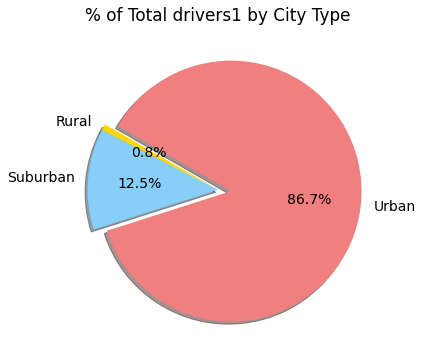

In [190]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents1,labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total drivers1 by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
plt.show()

In [186]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100*city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents


type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

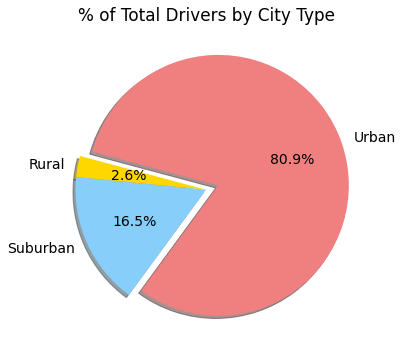

In [191]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig8.png")
# Show Figure
plt.show()